In [8]:
import numpy as np

from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
from pypfopt import risk_models

from openbb_terminal.sdk import openbb
import seaborn as sns
sns.set_theme()

In [21]:
prices = openbb.economy.index(["ADBE", "CP", "MSFT", "UNP", "VICI", "V", "BLK"])

# Expected Returns of the asset
viewdict = {
    "ADBE": 0.23, 
    "CP": 0.15,
    "MSFT": 0.15,
    "UNP": 0.12,
    "VICI": 0.16,
    "V": 0.20,
    "BLK": 0.12
}

cov_matrix = risk_models.sample_cov(prices)

<Axes: xlabel='Volatility', ylabel='Return'>

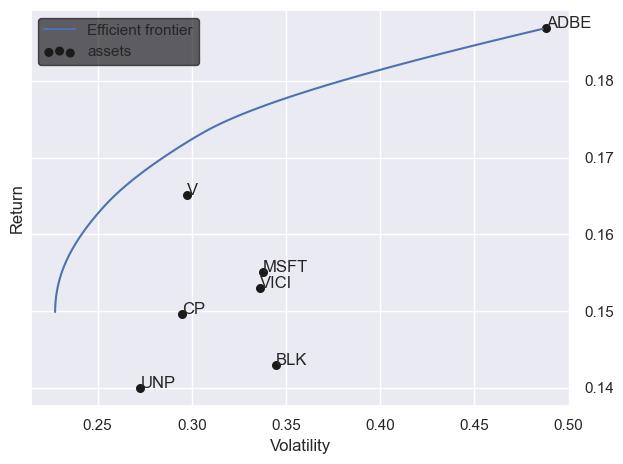

In [22]:
bl = BlackLittermanModel(
cov_matrix,
absolute_views=viewdict,
pi="equal"
)

rets = bl.bl_returns()
ef = EfficientFrontier(rets, cov_matrix)
weights = bl.bl_weights()

plotting.plot_efficient_frontier(ef, show_tickers=True)